In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

In [3]:
match =pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/dataset/IPL Matches 2008-2020.csv")
delivery=pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/dataset/IPL Ball-by-Ball 2008-2020.csv")

In [8]:
ipl=delivery.merge(match,left_on="id",right_on="id")

In [6]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
delivery.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [11]:
ipl.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


#### 1. Scatter plots 

In [12]:
# scatter plot are drawn between to contnious variables
# problems :-> draw a scatter plot between batsman Avg(x-axis) and 
# Batsman strike rate (y axis ) of top 50 batsman in ipl (All time)

In [18]:
# Avg vs SR graph of top 50 batsman (in term of total runs )
# Fetching a new dataframe with top 50 batsman

top50=ipl.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(50).index.tolist()
new_ipl=ipl[ipl["batsman"].isin(top50)]

In [19]:
new_ipl

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [30]:
# calculating SR
# SR=[(number of runs scored )/(number of balls played )]*100
runs=new_ipl.groupby("batsman")["batsman_runs"].sum()
balls=new_ipl.groupby("batsman")["batsman_runs"].count()
sr=(runs/balls)*100
sr=sr.reset_index()
sr

,batsman,batsman_runs
0,AB de Villiers,148.560049
1,AC Gilchrist,133.054662
2,AJ Finch,123.612824
3,AM Rahane,118.285714
4,AT Rayudu,123.198653
5,BB McCullum,127.040141
6,CH Gayle,142.788749
7,DA Miller,134.643377
8,DA Warner,137.575281
9,DPMD Jayawardene,118.552632


In [39]:
# Calculating Average
# avg=(Total number of runs )/(Number of Outs )

#calculating numbers of outs for top 50 batsman
out=ipl[ipl["player_dismissed"].isin(top50)]
nouts=out["player_dismissed"].value_counts()
avg=runs/nouts
avg=avg.reset_index()
avg.rename(columns={"index":"batsman",0:"avg"},inplace=True)
avg=avg.merge(sr,on="batsman")

In [40]:
avg

,batsman,avg,batsman_runs
0,AB de Villiers,40.408333,148.560049
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,25.379747,123.612824
3,AM Rahane,31.717742,118.285714
4,AT Rayudu,29.508065,123.198653
5,BB McCullum,27.692308,127.040141
6,CH Gayle,41.137931,142.788749
7,DA Miller,33.636364,134.643377
8,DA Warner,42.715447,137.575281
9,DPMD Jayawardene,28.603175,118.552632


In [45]:
# plot Scatter plot here 

trace=go.Scatter(x=avg["avg"],y=avg["batsman_runs"],
                 mode="markers",text=avg["batsman"],
                 marker={"color":"#bf3de8","size":16})
data=[trace]

layout=go.Layout(title="Batsman Avg vs SR",
                xaxis={"title":"Bastsman Average"},
                yaxis={"title":"Batsman Strike Rate"}
                )

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [46]:
trace=go.Scatter(x=avg["avg"],y=avg["batsman_runs"],
                 mode="markers",text=avg["batsman"],
                 marker={"color":"#bf3de8","size":16})
data=[trace]

layout=go.Layout(title="Batsman Avg vs SR",
                xaxis={"title":"Bastsman Average"},
                yaxis={"title":"Batsman Strike Rate"}
                )

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig,filename="myfile.html") # we can provide out own file name 

'myfile.html'

#### 2. Line Chart

In [53]:
# year by year batsman performance 

single =ipl[ipl["batsman"]=="V Kohli"]
single.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [64]:
single["season"]=pd.to_datetime(single["date"]).dt.year

<ipython-input-64-780c3b8c5cf6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
single["season"]

211       2008
212       2008
213       2008
216       2008
217       2008
          ... 
192772    2020
192773    2020
192774    2020
192775    2020
192892    2020
Name: season, Length: 4609, dtype: int64

In [62]:
performance=single.groupby("season")["batsman_runs"].sum().reset_index()

In [63]:
performance

,season,batsman_runs
0,2008,165
1,2009,246
2,2010,307
3,2011,557
4,2012,364
5,2013,634
6,2014,359
7,2015,505
8,2016,973
9,2017,308


In [67]:
single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4609 entries, 211 to 192892
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4609 non-null   int64  
 1   inning            4609 non-null   int64  
 2   over              4609 non-null   int64  
 3   ball              4609 non-null   int64  
 4   batsman           4609 non-null   object 
 5   non_striker       4609 non-null   object 
 6   bowler            4609 non-null   object 
 7   batsman_runs      4609 non-null   int64  
 8   extra_runs        4609 non-null   int64  
 9   total_runs        4609 non-null   int64  
 10  non_boundary      4609 non-null   int64  
 11  is_wicket         4609 non-null   int64  
 12  dismissal_kind    163 non-null    object 
 13  player_dismissed  163 non-null    object 
 14  fielder           122 non-null    object 
 15  extras_type       167 non-null    object 
 16  batting_team      4609 non-null   obje

In [74]:
single1 =ipl[ipl["batsman"]=="MS Dhoni"]
single1.columns
single1["season"]=pd.to_datetime(single1["date"]).dt.year
performance1=single1.groupby("season")["batsman_runs"].sum().reset_index()

<ipython-input-74-4fa590cac8c1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
#plot line chart here
trace=go.Scatter(x=performance["season"],y=performance["batsman_runs"],
               mode="lines+markers",marker={"color":"#bf3de8"},name="Virat Kohli")
trace1=go.Scatter(x=performance1["season"],y=performance1["batsman_runs"],
               mode="lines+markers",name="MS Dhoni")

data=[trace,trace1]
layout=go.Layout(title="Year by Year Performance",
                 xaxis={"title":"Season"},
                 yaxis={"title":"Total runs"})

fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [196]:
# multiple linecharts
def batsman_comp(*name):
    data=[]
    for i in name:
        single=ipl[ipl["batsman"]==i]
        performance=single.groupby("season")["batsman_runs"].sum().reset_index()
        
        trace=go.Scatter(x=performance["season"],y=performance["batsman_runs"],
                        mode="lines+markers",name=i)
        data.append(trace)
    layout=go.Layout(title="Batsman Records Comparator",
                    xaxis={"title":"Season"},
                    yaxis={"title":"Runs"})
    fig=go.Figure(data=data,layout=layout)
    
    pyo.plot(fig,filename="year_by_year")
        
    

In [198]:
batsman_comp("V Kohli","RG Sharma","DA Warner","MS Dhoni")

C:\Users\91993\anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `year_by_year` didn't end with .html. Adding .html to the end of your file.



#### Bar Chart

In [88]:
top10=ipl.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10).index.tolist()

In [92]:
top10_df=ipl[ipl["batsman"].isin(top10)]

In [94]:
top10_score=top10_df.groupby("batsman")["batsman_runs"].sum().reset_index()

In [95]:
top10_score

,batsman,batsman_runs
0,AB de Villiers,4849
1,CH Gayle,4772
2,DA Warner,5254
3,G Gambhir,4217
4,MS Dhoni,4632
5,RG Sharma,5230
6,RV Uthappa,4607
7,S Dhawan,5197
8,SK Raina,5368
9,V Kohli,5878


In [96]:
#plot BAR  graph

trace=go.Bar(x=top10_score["batsman"],y=top10_score["batsman_runs"])
data=[trace]
layout=go.Layout(title="Top Ten Batsman",
                xaxis={"title":"Batsman"},
                yaxis={"title":"Score"})
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### Three types of Bar Graphs
1. Nested Bar Graphs 
2. Stacked Bar Graphs
3. Overlayred Bar Graphs

In [106]:
iw=top10_df.groupby(["batsman","inning"])["batsman_runs"].sum().reset_index()
mask1=iw["inning"]==1
mask2=iw["inning"]==2
one=iw[mask1]
two=iw[mask2]

one.rename(columns={"batsman_runs":"1st Innings"},inplace=True)
two.rename(columns={"batsman_runs":"2nd Innings"},inplace=True)

final=one.merge(two,on="batsman")[["batsman","1st Innings","2nd Innings"]]

<ipython-input-106-566c0511eedf>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-566c0511eedf>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
final

,batsman,1st Innings,2nd Innings
0,AB de Villiers,2954,1895
1,CH Gayle,2723,2049
2,DA Warner,2823,2431
3,G Gambhir,1757,2460
4,MS Dhoni,2686,1946
5,RG Sharma,3043,2187
6,RV Uthappa,1883,2724
7,S Dhawan,3090,2107
8,SK Raina,3089,2279
9,V Kohli,3158,2720


In [103]:
one

,batsman,inning,batsman_runs
0,AB de Villiers,1,2954
2,CH Gayle,1,2723
4,DA Warner,1,2823
6,G Gambhir,1,1757
8,MS Dhoni,1,2686
10,RG Sharma,1,3043
12,RV Uthappa,1,1883
14,S Dhawan,1,3090
16,SK Raina,1,3089
18,V Kohli,1,3158


In [108]:
final

,batsman,1st Innings,2nd Innings
0,AB de Villiers,2954,1895
1,CH Gayle,2723,2049
2,DA Warner,2823,2431
3,G Gambhir,1757,2460
4,MS Dhoni,2686,1946
5,RG Sharma,3043,2187
6,RV Uthappa,1883,2724
7,S Dhawan,3090,2107
8,SK Raina,3089,2279
9,V Kohli,3158,2720


In [113]:
trace1=go.Bar(x=final["batsman"],y=final["1st Innings"],
             marker={"color":"#00a65a"},name="1st Inning")
trace2=go.Bar(x=final["batsman"],y=final["2nd Innings"],
             marker={"color":"#a6a65a"},name="2nd Inning")
data=[trace1,trace2]

layout=go.Layout(title="Inning Wise Scores",
                xaxis={"title":"Batsman"},
                yaxis={"title":"Runs"},
                barmode="overlay")
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [114]:
trace1=go.Bar(x=final["batsman"],y=final["1st Innings"],
             marker={"color":"#00a65a"},name="1st Inning")
trace2=go.Bar(x=final["batsman"],y=final["2nd Innings"],
             marker={"color":"#a6a65a"},name="2nd Inning")
data=[trace1,trace2]

layout=go.Layout(title="Inning Wise Scores",
                xaxis={"title":"Batsman"},
                yaxis={"title":"Runs"},
                barmode="stack")
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [112]:
trace1=go.Bar(x=final["batsman"],y=final["1st Innings"],
             marker={"color":"#00a65a"},name="1st Inning")

trace2=go.Bar(x=final["batsman"],y=final["2nd Innings"],
             marker={"color":"#a6a65a"},name="2nd Inning")
data=[trace1,trace2]

layout=go.Layout(title="Inning Wise Scores",
                xaxis={"title":"Batsman"},
                yaxis={"title":"Runs"}
                )
# by default nested bar 
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### 4.Bubble plot

In [119]:
new_ipl=new_ipl[new_ipl["batsman_runs"]==6]
six=new_ipl.groupby("batsman")["batsman_runs"].count().reset_index()

In [126]:
x=avg.merge(six,on="batsman")
trace=go.Scatter(x=x["avg"],y=x["batsman_runs_x"],mode="markers",
                marker={"size":x["batsman_runs_y"]})
data=[trace]
layout=go.Layout(title="Bubble chart",
                xaxis={"title":"Average"},
                yaxis={"title":"SR"})
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### Boxplot

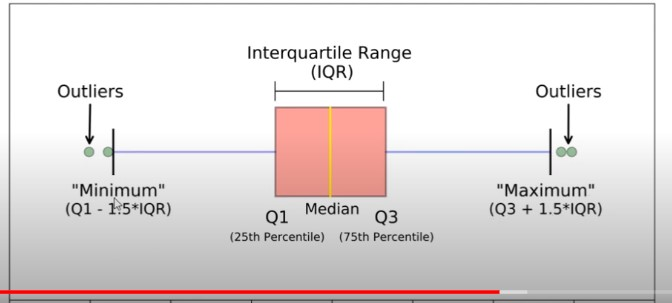

In [130]:
ipl["date"]=pd.to_datetime(ipl["date"])

In [131]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                193468 non-null  int64         
 1   inning            193468 non-null  int64         
 2   over              193468 non-null  int64         
 3   ball              193468 non-null  int64         
 4   batsman           193468 non-null  object        
 5   non_striker       193468 non-null  object        
 6   bowler            193468 non-null  object        
 7   batsman_runs      193468 non-null  int64         
 8   extra_runs        193468 non-null  int64         
 9   total_runs        193468 non-null  int64         
 10  non_boundary      193468 non-null  int64         
 11  is_wicket         193468 non-null  int64         
 12  dismissal_kind    9495 non-null    object        
 13  player_dismissed  9495 non-null    object        
 14  fiel

In [133]:
ipl["season"]=ipl["date"].dt.year

In [134]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                193468 non-null  int64         
 1   inning            193468 non-null  int64         
 2   over              193468 non-null  int64         
 3   ball              193468 non-null  int64         
 4   batsman           193468 non-null  object        
 5   non_striker       193468 non-null  object        
 6   bowler            193468 non-null  object        
 7   batsman_runs      193468 non-null  int64         
 8   extra_runs        193468 non-null  int64         
 9   total_runs        193468 non-null  int64         
 10  non_boundary      193468 non-null  int64         
 11  is_wicket         193468 non-null  int64         
 12  dismissal_kind    9495 non-null    object        
 13  player_dismissed  9495 non-null    object        
 14  fiel

In [137]:
match["date"]=pd.to_datetime(match["date"])

In [139]:
match["season"]=match["date"].dt.year

In [146]:
match_agg=delivery.groupby(["id"])["total_runs"].sum().reset_index()
season_wise=match_agg.merge(match,left_on="id",right_on="id")[["id","total_runs","season"]]
season_wise

,id,total_runs,season
0,335982,304,2008
1,335983,447,2008
2,335984,261,2008
3,335985,331,2008
4,335986,222,2008
...,...,...,...
811,1216547,402,2020
812,1237177,343,2020
813,1237178,263,2020
814,1237180,361,2020


In [150]:
trace1=go.Box(x=season_wise[season_wise["season"]==2008]["total_runs"],name="2008",marker={"color":"#00a65a"})
trace2=go.Box(x=season_wise[season_wise["season"]==2020]["total_runs"],name="2020")


data=[trace1,trace2]

layout=go.Layout(title="Total Score Ananlysis",
                xaxis={"title":"Total Score"})
fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

#### 7. Displots

In [151]:
# Plot Displot
import plotly.figure_factory as ff

avg

,batsman,avg,batsman_runs
0,AB de Villiers,40.408333,148.560049
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,25.379747,123.612824
3,AM Rahane,31.717742,118.285714
4,AT Rayudu,29.508065,123.198653
5,BB McCullum,27.692308,127.040141
6,CH Gayle,41.137931,142.788749
7,DA Miller,33.636364,134.643377
8,DA Warner,42.715447,137.575281
9,DPMD Jayawardene,28.603175,118.552632


In [153]:
hist_data=[avg["avg"]]
group_labels=["Average"]
fig=ff.create_distplot(hist_data,group_labels)
pyo.plot(fig)

'temp-plot.html'

In [154]:
hist_data=[avg["avg"],avg["batsman_runs"]]
group_labels=["Average","Strike Rate"]
fig=ff.create_distplot(hist_data,group_labels)
pyo.plot(fig)

'temp-plot.html'

In [155]:
hist_data=[avg["avg"],avg["batsman_runs"]]
group_labels=["Average","Strike Rate"]
fig=ff.create_distplot(hist_data,group_labels,bin_size=[10,20])
pyo.plot(fig)

'temp-plot.html'

#### 6.Histogram

In [157]:
x=delivery.groupby("batsman")["batsman_runs"].count()>150
x=x[x].index.tolist

new=delivery[delivery["batsman"].isin(x)]
runs=new.groupby("batsman")["batsman_runs"].sum()

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [method]

In [166]:
x=delivery.groupby("batsman")["batsman_runs"].count()>150

In [167]:
x=x[x].index.tolist()

In [168]:
x

['A Ashish Reddy',
 'A Mishra',
 'A Symonds',
 'AA Jhunjhunwala',
 'AB Agarkar',
 'AB de Villiers',
 'AC Gilchrist',
 'AD Mathews',
 'AD Russell',
 'AJ Finch',
 'AL Menaria',
 'AM Nayar',
 'AM Rahane',
 'AP Tare',
 'AR Patel',
 'AS Raut',
 'AT Rayudu',
 'Azhar Mahmood',
 'B Chipli',
 'B Kumar',
 'BA Stokes',
 'BB McCullum',
 'BJ Hodge',
 'C de Grandhomme',
 'CA Ingram',
 'CA Lynn',
 'CA Pujara',
 'CH Gayle',
 'CH Morris',
 'CJ Anderson',
 'CL White',
 'CM Gautam',
 'D Padikkal',
 'DA Miller',
 'DA Warner',
 'DB Das',
 'DB Ravi Teja',
 'DJ Bravo',
 'DJ Hooda',
 'DJ Hussey',
 'DJG Sammy',
 'DPMD Jayawardene',
 'DR Smith',
 'DT Christian',
 'DW Steyn',
 'E Lewis',
 'EJG Morgan',
 'F du Plessis',
 'FY Fazal',
 'G Gambhir',
 'GC Smith',
 'GH Vihari',
 'GJ Bailey',
 'GJ Maxwell',
 'Gurkeerat Singh',
 'HH Gibbs',
 'HH Pandya',
 'HM Amla',
 'Harbhajan Singh',
 'IK Pathan',
 'Ishan Kishan',
 'J Botha',
 'JA Morkel',
 'JC Buttler',
 'JD Ryder',
 'JEC Franklin',
 'JH Kallis',
 'JM Bairstow',
 'JP

In [172]:
new=delivery[delivery["batsman"].isin(x)]

In [174]:
runs=new.groupby("batsman")["batsman_runs"].sum()
balls=new.groupby("batsman")["batsman_runs"].count()
sr=(runs/balls)*100
sr=sr.reset_index()
sr

,batsman,batsman_runs
0,A Ashish Reddy,142.857143
1,A Mishra,88.292683
2,A Symonds,124.711908
3,AA Jhunjhunwala,99.541284
4,AB Agarkar,111.875000
...,...,...
178,Y Nagar,105.166052
179,Y Venugopal Rao,113.872832
180,YK Pathan,137.510730
181,YV Takawale,104.918033


In [179]:
# plot histogram
trace=go.Histogram(x=sr["batsman_runs"],xbins={"size":5})
data=[trace]
layout=go.Layout(title="Strike Rate Variations",xaxis={"title":"Strike Rate"})
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [183]:
trace=go.Histogram(x=sr["batsman_runs"],xbins={"size":5,'start':50,'end':100})
data=[trace]
layout=go.Layout(title="Strike Rate Variations",xaxis={"title":"Strike Rate"})
fig=go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

#### Heatmaps

In [189]:
six=delivery[delivery["batsman_runs"]==6]
six=six.groupby(["batting_team","over"])["batsman_runs"].count().reset_index()
six["over"]=six["over"]+1
six

,batting_team,over,batsman_runs
0,Chennai Super Kings,1,8
1,Chennai Super Kings,2,23
2,Chennai Super Kings,3,51
3,Chennai Super Kings,4,51
4,Chennai Super Kings,5,56
...,...,...,...
291,Sunrisers Hyderabad,16,35
292,Sunrisers Hyderabad,17,30
293,Sunrisers Hyderabad,18,52
294,Sunrisers Hyderabad,19,64


In [190]:
#plotting Heatmaps
trace=go.Heatmap(x=six["batting_team"],y=six["over"],z=six["batsman_runs"])

data=[trace]
layout=go.Layout(title="Six Heatmap")
fig=go.Figure(data=data,layout=layout)

pyo.plot(fig)

'temp-plot.html'

In [192]:
#side by side heatmap

dots=delivery[delivery["batsman_runs"]==0]
dots["over"]=dots["over"]+1
dots=dots.groupby(["batting_team","over"])["batsman_runs"].count().reset_index()

from plotly import tools

trace1=go.Heatmap(x=six["batting_team"],y=six["over"],
                  z=six["batsman_runs"].values.tolist())

trace2=go.Heatmap(x=dots["batting_team"],y=dots["over"],
                  z=dots["batsman_runs"].values.tolist())

fig=tools.make_subplots(rows=1,cols=2,subplot_titles=["6's","0's"],shared_yaxes=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
pyo.plot(fig)

C:\Users\91993\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



'temp-plot.html'